In [2]:

# import  Pkg
using Random, Distributions
using Integrals, Cubature
# using Optimization, OptimizationMOI, OptimizationOptimJL, DifferentiationInterface, Ipopt
# using ForwardDiff, ModelingToolkit
using Distributed
using Printf

import Plots as pl
import LinearAlgebra as la
import DataFrames as df
import CSV as csv
################################################################################


In [37]:
### 6 algorithms, Policy with K=10 arms, T=10000, models=1000 


# include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Gaussian/eTS_alg_file_gaussian.jl")
# include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Gaussian/e_const_TS_alg_file_gaussian.jl")
# include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Gaussian/eTS_finiteDecay_alg_file_gaussian.jl")
# # include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Gaussian/eTS_finiteDecay_tT2_alg_file_gaussian.jl")
# include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Gaussian/e_third_TS_alg_file_gaussian.jl")
# include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Gaussian/thompson_sampling_alg_file_gaussian.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Gaussian/TS_decay_greedy_knownT_alg_file_gaussian.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Gaussian/TS_decay_greedy_knownT_1_eps_gaussian_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Gaussian/TS_decay_greedy_knownT_eps_const_gaussian_alg_file.jl")

################################################################################
# set_printoptions(precision=2,suppress=True)

hz = 10000 #int(input("Enter the horizon : "))
num_models = 1000
horizon = 1:hz

# tot_seed_vals = 500
# seed_values = 1:tot_seed_vals 

tot_seed_vals = 1
seed_values = 1:tot_seed_vals 

 #int(input("Enter the #models : "))#4
num_arms = 10 #int(input("Enter the #arms : "))

alg_names_to_run = [TS_decay_greedy_knownT_eps_const]
# alg_names_to_run = [TS_decay_greedy_knownT] #,,[""] # # #,"TS_decay_greedy_knownT","eTS_finiteDecay_tT2_alg"]
# alg_names_to_run = ["thom_samp_alg","TS_decay_greedy_knownT"] #,,[""] # # #,"TS_decay_greedy_knownT","eTS_finiteDecay_tT2_alg"]
# alg_names_to_run = ["TS_decay_greedy_knownT"]#,"thom_samp_alg","eTS_alg","e_const_TS_alg","e_third_TS_alg","eTS_finiteDecay_alg" ]#
model_chosen_to_run = [i for i in 1:num_models] #[i for i in 1:100 if (i != 70 && !(i in 22:40))]
# model_chosen_to_run = 71:100 #1000 #[30,32,38,39]
# alg_names_to_run = [TS_decay_greedy_knownT_1_eps,thom_samp_alg]
# model_chosen_to_run = [1]

folder_name = "horizon_"*string(hz)*"_arms_"*string(num_arms)*"_seed_"*string(tot_seed_vals)*"_models_"*string(length(model_chosen_to_run))*"_t_T_2_rate"
mkpath(folder_name)

for alg_name in alg_names_to_run
    mkpath(folder_name*"/"*string(alg_name))
end

# file_name_with_path = "horizon_""_arms_""_seed_""_models_"**"/
model = zeros((num_models,num_arms))

for m in 1:num_models
    Random.seed!(m*9)
    model[m,:] = rand(num_arms)
    if num_arms == 5
        model[1,:] = [0.1 0.2 0.3 0.4 0.5]
    elseif num_arms == 10
        
        model[1,:] = [1   0.7 0.7 0.7 0.7  0.7 0.7 0.7 0.7 0.7]
        model[2,:] = [0.3 0.2 0.2 0.2 0.2  0.2 0.2 0.2 0.2 0.2]
    elseif num_arms == 50
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5       
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 ]
# 
    elseif num_arms == 100
        model[1,:] = [0.75 0.65 0.65 0.65 0.65  0.65 0.65 0.65 0.65 0.65 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5]
    elseif num_arms == 500
        model[1,:] = ones(num_arms)
        model[1,1] = 0.75
        model[1,2:num_arms] = 0.25
    end

end

hor_names = [string(i) for i in 1:hz]

for generic in alg_names_to_run #:#]:#,"TS"]:#,"ucb"]:#"randomized_ucb_sqrt", "TS","2_norm","2norm_Greedy", "2norm_decay_Greedy","2norm_decay_Greedy_knownT","2norm_Greedy_decay_knownT"]: #"2norm"

    num_models_run = 0
    rewards_every_step_generic = zeros((num_models,hz))
    rewards_every_step_arms_generic = zeros((num_models,hz))
    regret_generic_model = zeros((num_models,hz))
    regret_seed_generic_model_list = Float64[]
    @time begin
        for model_chosen in model_chosen_to_run 

            num_models_run = num_models_run + 1
            arms = model[model_chosen,:]
            p_max = maximum(arms)
            data_generic = zeros((tot_seed_vals,hz))
            regret_every_step_generic = zeros((1,hz))
            regret_seed = zeros((tot_seed_vals,hz))
            times_sampled_avg = zeros(num_arms)

            for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                seed = model_chosen
                # @show data_generic[count,:]
            
                (data_generic[count,:]) = generic(model[model_chosen,:,:],seed,hz)
                rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]

           
                regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]

                regret_generic_model[model_chosen,:] .+= regret_seed[count,:]/tot_seed_vals
                # times_sampled_avg .+= times_sampled
                # @printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                
            #     time_taken[count] = time.process_time() 
            end
            @printf "%s %d %0.2f \n" "model:" model_chosen sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
          
        end
        print(string(generic)*" Regret avg. over models = ")
        @printf "%0.2f \n" sum(regret_generic_model[:,hz])/length(model_chosen_to_run)

        # regret_df = df.DataFrame(round.(sum(regret_generic_model,dims=1)/length(model_chosen_to_run),sigdigits=4),hor_names)
        regret_df = df.DataFrame(round.(regret_generic_model,sigdigits=4),hor_names)
        # print(regret_df)
        csv_file_name  = folder_name*"/"*string(generic)*"/regret_"*string(generic)*"_models_"*string(length(model_chosen_to_run))*"_t_T_2_rate"*".csv"
        csv.write(csv_file_name, regret_df)
    end
end


LoadError: UndefVarError: `TS_decay_greedy_knownT_eps_const` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

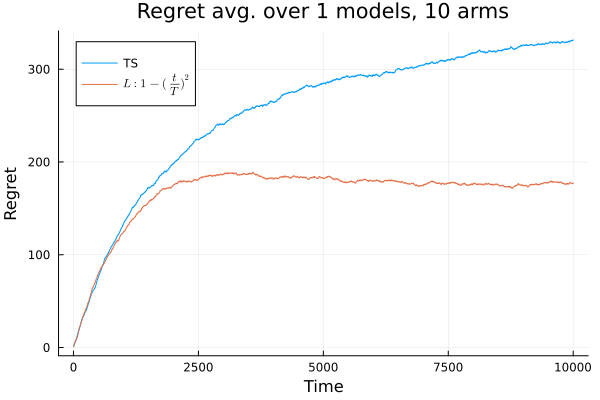

In [71]:
import Plots as pl
using LaTeXStrings

regret_TS = 0
regret_eTS = 0
regret_e_const_TS = 0
regret_e_third_TS = 0
regret_eTS_finiteDecay = 0
regret_TS_decay_greedy_knownT = 0

#### plotting averaged over models
for model in model_chosen_to_run
 
    regret_TS = regret_TS .+ sum(regret_seed_TS_model_list[model],dims=1)[:]/tot_seed_vals
    # regret_eTS = regret_eTS .+ sum(regret_seed_eTS_model_list[model],dims=1)[:]/tot_seed_vals
    # regret_e_const_TS = regret_e_const_TS .+ sum(regret_seed_e_const_TS_model_list[model],dims=1)[:]/tot_seed_vals
    # regret_e_third_TS = regret_e_third_TS .+ sum(regret_seed_e_third_TS_model_list[model],dims=1)[:]/tot_seed_vals
    # regret_eTS_finiteDecay = regret_eTS_finiteDecay .+ sum(regret_seed_eTS_finiteDecay_model_list[model],dims=1)[:]/tot_seed_vals
    regret_TS_decay_greedy_knownT = regret_TS_decay_greedy_knownT .+ sum(regret_seed_TS_decay_greedy_knownT_model_list[model],dims=1)[:]/tot_seed_vals
end

num_models = length(model_chosen_to_run)
# list_of_all_alg_regrets = [regret_TS/num_models regret_eTS/num_models regret_e_const_TS/num_models regret_e_third_TS/num_models regret_eTS_finiteDecay/num_models regret_TS_decay_greedy_knownT/num_models]
list_of_all_alg_regrets = [regret_TS/num_models  regret_TS_decay_greedy_knownT/num_models]
list_of_all_labels = ["TS"  L"L:1-(\frac{t}{T})^2"]
pic = pl.plot(horizon,list_of_all_alg_regrets,label=list_of_all_labels) #,color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
    # pl.plot(horizon,[regret_TS,label="t/T")# ,color=algo_plot_pars['2_norm_decay_greedy_knownT'][0],label=algo_plot_pars['2_norm_decay_greedy_knownT'][1])
pl.xlabel!("Time")
pl.ylabel!("Regret")
pl.title!("Regret avg. over "*string(num_models)*" models, "*string(num_arms)*" arms")
display(pic)
# pl.savefig("regret_model_"*string(num_models)*"_arms_"*string(num_arms)*"_seed_"*string(tot_seed_vals)*"_hori_"*string(hz)*"_t_T_2_rate.pdf")


In [8]:
### 6 algorithms, Policy with K=10 arms, T=10000, models=1000 


include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Gaussian/eTS_alg_file_gaussian.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Gaussian/e_const_TS_alg_file_gaussian.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Gaussian/eTS_finiteDecay_alg_file_gaussian.jl")
# include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Gaussian/eTS_finiteDecay_tT2_alg_file_gaussian.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Gaussian/e_third_TS_alg_file_gaussian.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Gaussian/thompson_sampling_alg_file_gaussian.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Gaussian/TS_decay_greedy_knownT_alg_file_gaussian.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Gaussian/MOTS_alg_file_gaussian.jl")

################################################################################
# set_printoptions(precision=2,suppress=True)

hz = 10000 #int(input("Enter the horizon : "))
num_models = 2
horizon = 1:hz

tot_seed_vals = 499
seed_values = 501:999 

 #int(input("Enter the #models : "))#4
num_arms = 50 #int(input("Enter the #arms : "))

alg_names_to_run = ["MOTS"]
# alg_names_to_run = ["TS_decay_greedy_knownT"] #,,[""] # # #,"TS_decay_greedy_knownT","eTS_finiteDecay_tT2_alg"]
# alg_names_to_run = ["thom_samp_alg","eTS_alg","e_const_TS_alg","e_third_TS_alg","eTS_finiteDecay_alg", "TS_decay_greedy_knownT" ]#
# alg_names_to_run = ["eTS_alg"]#,"e_const_TS_alg","e_third_TS_alg"]model_chosen_to_run = [i for i in 1:num_models] #[i for i in 1:100 if (i != 70 && !(i in 22:40))]
# model_chosen_to_run = 71:100 #1000 #[30,32,38,39]
# model_chosen_to_run = [i for i in 1:num_models] 
model_chosen_to_run = [2]
# model_chosen_to_run = [2]

folder_name = "horizon_"*string(hz)*"_arms_"*string(num_arms)*"_seed_"*string(tot_seed_vals)*"_models_"*string(length(model_chosen_to_run))*"_t_T_2_rate"
mkpath(folder_name)

for alg_name in alg_names_to_run
    mkpath(folder_name*"/"*alg_name)
end

# file_name_with_path = "horizon_""_arms_""_seed_""_models_"**"/
model = zeros((num_models,num_arms))

for m in 1:num_models
    Random.seed!(m*9)
    model[m,:] = rand(num_arms)
    if num_arms == 5
        model[1,:] = [0.1 0.2 0.3 0.4 0.5]
    elseif num_arms == 10
        
        model[1,:] = [1   0.7 0.7 0.7 0.7  0.7 0.7 0.7 0.7 0.7]
        model[2,:] = [0.3 0.2 0.2 0.2 0.2  0.2 0.2 0.2 0.2 0.2]
    elseif num_arms == 50
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5       
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 ]
        model[2,:] = [0.3 0.2 0.2 0.2 0.2  0.2 0.2 0.2 0.2 0.2
                      0.1 0.1 0.1 0.1 0.1  0.1 0.1 0.1 0.1 0.1     
                      0.1 0.1 0.1 0.1 0.1  0.1 0.1 0.1 0.1 0.1
                      0.1 0.1 0.1 0.1 0.1  0.1 0.1 0.1 0.1 0.1
                      0.1 0.1 0.1 0.1 0.1  0.1 0.1 0.1 0.1 0.1]
# 
    elseif num_arms == 100
        model[1,:] = [0.75 0.65 0.65 0.65 0.65  0.65 0.65 0.65 0.65 0.65 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5]
    elseif num_arms == 500
        model[1,:] = ones(num_arms)
        model[1,1] = 0.75
        model[1,2:num_arms] = 0.25
    end

end
    # elseif num_arms == 500:
    #     model[0] = linspace(0.9,0.1,num_arms)
    
    # opt_arms[m] = argmax(model[m])
    #print(m,model[m])

# max_means = reshape(max(model,1),(num_models,1))*ones((num_models,num_arms))
# optimal_model_arms = (model >= max_means ) + 0


# model_chosen_to_run = 1:num_models #)##,2,6,7]#1,2,3,4]#,1,2,3,4]#[i for i in range(num_models)]
# model_chosen_to_run = [0,7,8,9,10,11,12,13]

regret_TS_model_list = []
regret_TS_new_model_list = []
regret_TS_copies_model_list = []
regret_randomized_TS_finite_hori_model_list = []
regret_randomized_ucb_range_model_list = []
regret_randomized_ucb_model_list = []
regret_ucb_model_list = []
regret_TS_finite_hori_model_list = []
regret_seed_TS_finite_hori_model_list = []

regret_seed_TS_model_list = []
regret_seed_TS_new_model_list = []
regret_seed_TS_copies_model_list = []
regret_seed_2norm_model_list = []
regret_seed_TS_Greedy_model_list = []
regret_seed_TS_ucb_model_list = []
regret_seed_TS_decay_Greedy_model_list = []
regret_seed_TS_decay_greedy_knownT_model_list = []
regret_seed_TS_greedy_decay_knownT_model_list = []
regret_seed_randomized_ucb_model_list = []

regret_eTS_model_list = []
regret_seed_eTS_model_list = []
regret_e_const_TS_model_list = []
regret_seed_e_const_TS_model_list = []
regret_TS_decay_greedy_knownT_model_list = []

regret_eTS_finiteDecay_model_list = []
regret_seed_eTS_finiteDecay_model_list = []

regret_e_third_TS_model_list = []
regret_seed_e_third_TS_model_list = []

regret_MOTS_model_list = []
regret_seed_MOTS_model_list = []


hor_names = [string(i) for i in 1:hz]

for generic in alg_names_to_run #:#]:#,"TS"]:#,"ucb"]:#"randomized_ucb_sqrt", "TS","2_norm","2norm_Greedy", "2norm_decay_Greedy","2norm_decay_Greedy_knownT","2norm_Greedy_decay_knownT"]: #"2norm"

    num_models_run = 0
    rewards_every_step_generic = zeros((num_models,hz))
    rewards_every_step_arms_generic = zeros((num_models,hz))
    regret_generic_model = zeros((num_models,hz))
    regret_seed_generic_model_list = []
    # avg_arms_sampled_generic = zeros((num_models,hz,num_arms))
    # avg_opt_arms_sampled_generic = zeros(hz)

    @time begin
        for model_chosen in model_chosen_to_run 

        
            #model_chosen = 6
            num_models_run = num_models_run + 1
            arms = model[model_chosen,:]
            # @show arms
            # max_arm_ind = where(optimal_model_arms[model_chosen] == 1)[0][0]
            # print(arms,max_arm_ind)
            p_max = maximum(arms)
            # best_rew = hz*p_max
        # 
            # data_generic = zeros((tot_seed_vals,hz,num_arms))
            data_generic = zeros((tot_seed_vals,hz))
            # arms_sampled_generic = zeros((tot_seed_vals,hz,num_arms))
            # regret_alg_generic = zeros(tot_seed_vals)
            regret_every_step_generic = zeros((1,hz))
            # regret_seed_time_generic = zeros((tot_seed_vals,hz))
    
            # regret_seed_generic = zeros((tot_seed_vals))
            
            regret_seed = zeros((tot_seed_vals,hz))
            
            if generic == "thom_samp_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = thom_samp_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]

                    # @printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                push!(regret_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                push!(regret_seed_TS_model_list,regret_seed)
                
                push!(regret_seed_generic_model_list,regret_seed)

                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "eTS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = eTS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)
                push!(regret_seed_eTS_model_list,regret_seed)

                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "e_const_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = e_const_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_const_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)
                push!(regret_seed_e_const_TS_model_list,regret_seed)

                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "e_third_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = e_third_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_third_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                push!(regret_seed_e_third_TS_model_list,regret_seed)
                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "eTS_finiteDecay_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = eTS_finiteDecay_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_finiteDecay_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                push!(regret_seed_eTS_finiteDecay_model_list,regret_seed)
                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "TS_decay_greedy_knownT"
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = value_policy_alg_TS_decay_greedy_knownT(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                    # @show p_max*LinRange(1,hz,hz),data_generic[count,:]
                    @printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                push!(regret_TS_decay_greedy_knownT_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_TS_decay_greedy_knownT_model_list,regret_seed)
            
                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
               
            elseif generic == "MOTS"
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]

                    # println("MOTS")
                    data_generic[count,:] = MOTS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                    # @show p_max*LinRange(1,hz,hz),data_generic[count,:]
                    @printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_MOTS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_MOTS_model_list,regret_seed)
            
                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
               
            end
            reg_temp = sum(regret_seed,dims=1)/tot_seed_vals
            regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
            csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
            csv.write(csv_file_name, regret_df)
            regret_generic_model[model_chosen,:] = reg_temp[1,:]
        end
        regret_avg_model_df = df.DataFrame(round.(sum(regret_generic_model,dims=1)/length(model_chosen_to_run),sigdigits=4),hor_names)
        csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_avg_over_"*string(length(model_chosen_to_run))*"_t_T_2_rate"*".csv"
        csv.write(csv_file_name, regret_avg_model_df)
        
    end
end


Seed = 501, Regret = 854.92 
Seed = 502, Regret = 966.58 
Seed = 503, Regret = 753.33 
Seed = 504, Regret = 640.99 
Seed = 505, Regret = 789.93 
Seed = 506, Regret = 1538.73 
Seed = 507, Regret = 1174.96 
Seed = 508, Regret = 1513.02 
Seed = 509, Regret = 910.31 
Seed = 510, Regret = 868.57 
Seed = 511, Regret = 885.56 
Seed = 512, Regret = 1675.73 
Seed = 513, Regret = 1074.66 
Seed = 514, Regret = 887.02 
Seed = 515, Regret = 1554.82 
Seed = 516, Regret = 904.54 
Seed = 517, Regret = 1037.73 
Seed = 518, Regret = 964.53 
Seed = 519, Regret = 840.20 
Seed = 520, Regret = 1164.93 
Seed = 521, Regret = 1330.51 
Seed = 522, Regret = 979.64 
Seed = 523, Regret = 1013.63 
Seed = 524, Regret = 804.04 
Seed = 525, Regret = 686.71 
Seed = 526, Regret = 1575.04 
Seed = 527, Regret = 800.72 
Seed = 528, Regret = 739.58 
Seed = 529, Regret = 1109.42 
Seed = 530, Regret = 690.22 
Seed = 531, Regret = 1569.19 
Seed = 532, Regret = 746.22 
Seed = 533, Regret = 1067.71 
Seed = 534, Regret = 1225.96 

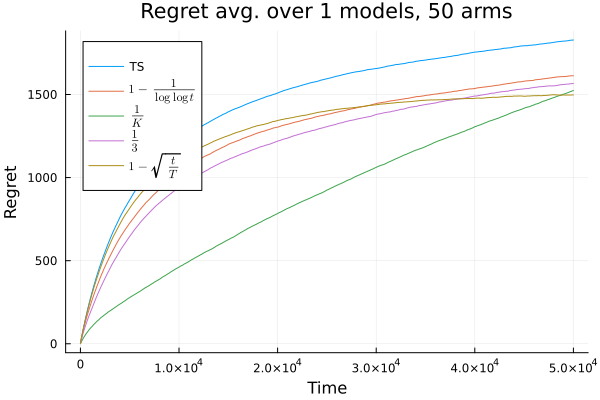

In [22]:
import Plots as pl
using LaTeXStrings

regret_TS = 0
regret_eTS = 0
regret_e_const_TS = 0
regret_e_third_TS = 0
regret_eTS_finiteDecay = 0
regret_TS_decay_greedy_knownT = 0

#### plotting averaged over models
for model in model_chosen_to_run
 
    regret_TS = regret_TS .+ sum(regret_seed_TS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_eTS = regret_eTS .+ sum(regret_seed_eTS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_e_const_TS = regret_e_const_TS .+ sum(regret_seed_e_const_TS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_e_third_TS = regret_e_third_TS .+ sum(regret_seed_e_third_TS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_eTS_finiteDecay = regret_eTS_finiteDecay .+ sum(regret_seed_eTS_finiteDecay_model_list[model],dims=1)[:]/tot_seed_vals
    # regret_TS_decay_greedy_knownT = regret_TS_decay_greedy_knownT .+ sum(regret_seed_TS_decay_greedy_knownT_model_list[model],dims=1)[:]/tot_seed_vals
end

list_of_all_labels = ["TS" L"1-\frac{1}{\log\log t}" L"\frac{1}{K}" L"\frac{1}{3}" L"1-\sqrt{\frac{t}{T}}"]# L"L:1-(\frac{t}{T})^2"]

num_models = length(model_chosen_to_run)
list_of_all_alg_regrets = [regret_TS/num_models regret_eTS/num_models regret_e_const_TS/num_models regret_e_third_TS/num_models regret_eTS_finiteDecay/num_models] # regret_TS_decay_greedy_knownT/num_models]
# list_of_all_alg_regrets = [regret_TS/num_models  regret_TS_decay_greedy_knownT/num_models]
# list_of_all_labels = ["TS"  L"L:1-(\frac{t}{T})^2"]
pic = pl.plot(horizon,list_of_all_alg_regrets,label=list_of_all_labels) #,color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
    # pl.plot(horizon,[regret_TS,label="t/T")# ,color=algo_plot_pars['2_norm_decay_greedy_knownT'][0],label=algo_plot_pars['2_norm_decay_greedy_knownT'][1])
pl.xlabel!("Time")
pl.ylabel!("Regret")
pl.title!("Regret avg. over "*string(num_models)*" models, "*string(num_arms)*" arms")
display(pic)
# pl.savefig("regret_model_"*string(num_models)*"_arms_"*string(num_arms)*"_seed_"*string(tot_seed_vals)*"_hori_"*string(hz)*"_t_T_2_rate.pdf")
